<a href="https://colab.research.google.com/github/frasheed-dev/edx_TinyML_specialization/blob/master/colabs/2-03-09-AssignmentQuestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note: Please note that this assignment is part of the course and I am doing my solution here to have a copy of my work in my personal repository. In no way I am trying to share the solution. We are here to learn from eachother not to cheat. Please close this notebook if you haven't solved your assignment yet.**

# Create a CNN to classify Cifar-10

Learn about Cifar-10 here: https://www.cs.toronto.edu/~kriz/cifar.html

In class you saw how to build a Convolutional Neural Network that classified Fashion MNIST. Take what you learned to build a CNN that recognizes the 10 classes of CIFAR. It will be a similar network, but there are some key differences you'll need to take into account.

First, while MNIST were 28x28 monochome images (1 color channel), CIFAR are 32x32 color images (3 color channels).

Second, MNIST images are simple, containing just the object, centered in the image, with no background. CIFAR ones can have the object with a background -- for example airplanes might have a cloudy sky behind them! As such you should expect your accuracy to be a bit lower. 

We start by setting up the problem for you.

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

170508288/170498071 [==============================] - 11s 0us/step


We then definte some of the model for you but leave most of it for you to fill in! 

*A hint: your model may want to learn some high level features and then classify them.*

In [4]:
FIRST_LAYER = tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3))
HIDDEN_LAYER_TYPE_1 = tf.keras.layers.MaxPooling2D(2, 2)
HIDDEN_LAYER_TYPE_2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu')
HIDDEN_LAYER_TYPE_3 = tf.keras.layers.MaxPooling2D(2, 2)
HIDDEN_LAYER_TYPE_4 = tf.keras.layers.Conv2D(64, (3,3), activation='relu')
HIDDEN_LAYER_TYPE_5 = tf.keras.layers.Dense(20, activation='relu')
LAST_LAYER = tf.keras.layers.Dense(10, activation='softmax')

model = models.Sequential([
       FIRST_LAYER,
       HIDDEN_LAYER_TYPE_1,
       HIDDEN_LAYER_TYPE_2,
       HIDDEN_LAYER_TYPE_3,
       HIDDEN_LAYER_TYPE_4,
       layers.Flatten(),
       HIDDEN_LAYER_TYPE_5,
       LAST_LAYER,
])

You then need to define loss function. And you can then train your model. Once training is done you'll see a plot of training and validation accuracy. You'll know you have a reasonable model with a reasonable loss funciton if your final training accuracy ends up in the 70s (or possibly higher).

*A hint: your model may want to learn different categories.*

Epoch 1/20
1563/1563 [==============================] - 22s 9ms/step - loss: 2.0832 - accuracy: 0.2292 - val_loss: 1.8505 - val_accuracy: 0.3283
Epoch 2/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.7047 - accuracy: 0.3790 - val_loss: 1.5431 - val_accuracy: 0.4451
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4906 - accuracy: 0.4612 - val_loss: 1.6123 - val_accuracy: 0.4231
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3753 - accuracy: 0.5066 - val_loss: 1.3258 - val_accuracy: 0.5281
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2912 - accuracy: 0.5395 - val_loss: 1.2597 - val_accuracy: 0.5556
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2174 - accuracy: 0.5681 - val_loss: 1.1997 - val_accuracy: 0.5780
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1528 - accuracy: 0.5940 - val_loss: 1.1635 - val_ac

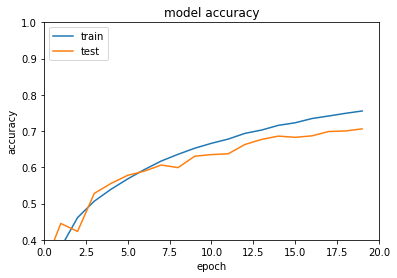

In [5]:
LOSS = 'sparse_categorical_crossentropy'
NUM_EPOCHS = 20 #You can change this value if you like to experiment with it to get better accuracy

# Compile the model
model.compile(optimizer='sgd',
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS, 
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

Finally, pick a better optimizer. And re-train your model. You'll know you have a reasonable model with a reasonable loss funciton and optimizer if your final training accuracy ends up in the 80s (or possibly higher).

*A hint: your model may want to learn adaptively.*

Epoch 1/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8481 - accuracy: 0.7074 - val_loss: 0.9132 - val_accuracy: 0.6916
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7753 - accuracy: 0.7317 - val_loss: 0.9027 - val_accuracy: 0.6961
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7062 - accuracy: 0.7551 - val_loss: 0.8609 - val_accuracy: 0.7132
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6424 - accuracy: 0.7758 - val_loss: 0.8633 - val_accuracy: 0.7148
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5908 - accuracy: 0.7923 - val_loss: 0.8523 - val_accuracy: 0.7270
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5441 - accuracy: 0.8097 - val_loss: 0.8916 - val_accuracy: 0.7169
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4992 - accuracy: 0.8249 - val_loss: 0.9193 - val_ac

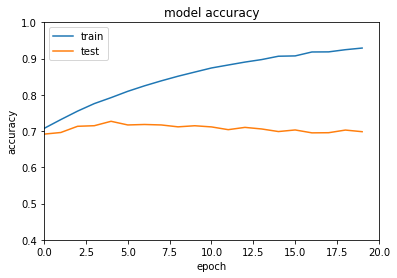

In [6]:
OPTIMIZER = 'adam'

# Compile the model
model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS, 
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()